<a href="https://colab.research.google.com/github/asonthalia/Tensorflow-Helpers/blob/master/Neural_Networks_using_a_Noisy_Sine_Wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

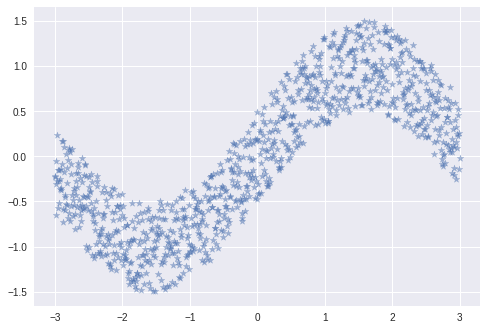

In [2]:
n_observations = 1000
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha = 0.5, marker = "*")

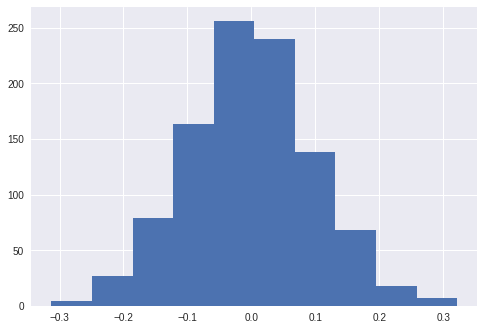

In [3]:
# Creating the NN in tensorflow
# Creating the placeholders for the X axis and the Y axis variables

X = tf.placeholder(tf.float32, name = "X")
Y = tf.placeholder(tf.float32, name = "Y")

# Creating 1000 random vales to feed into the network

sess = tf.InteractiveSession()
n = tf.random_normal([1000], stddev = 0.1).eval()
plt.hist(n)

# Creating the Weight and the Bias Variables

W = tf.Variable(tf.random_normal([1], dtype = tf.float32, stddev = 0.1), name = "weight")
B = tf.Variable(tf.constant([0], dtype = tf.float32), name = "bias")

# Formula for calulating Y-pred

Y_pred = W * X + B

0.5042979
0.41124317
Iteration no. of break: 
11


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


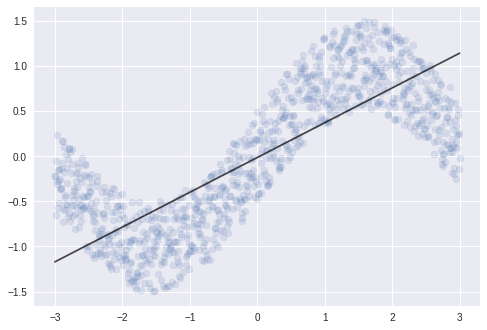

In [27]:
# We're going to use gradient descent to learn what the best value of W and b is. 
def distance(p1, p2) :
  return tf.abs(p1 - p2)

# Defining our cost function - Reducing the cost of 50 - 100 inputs fed into the network
cost = tf.reduce_mean(distance(Y_pred, Y))

# Using an optimizer to minimize the cost function
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.138).minimize(cost)

# We create a session to use the graph
n_iterations = 200

# Plot the true data distribution
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha = 0.15)

# Start the tensorflow session

with tf.Session() as sess:
  # Let's tell tensorflow what variables we need to initialise
  sess.run(tf.global_variables_initializer())
  
  # Running the loop over the epochs
  prev_training_cost = 0.0
  for it_i in range(n_iterations):
    sess.run(optimizer, feed_dict = {X: xs, Y: ys})
    # Compute the training cost
    training_cost = sess.run(cost, feed_dict = {X: xs, Y: ys})
    
    # Do the following every 10 iterations
    if it_i % 10 == 0:
      
      # Plotting the x vs y on the graph 
      ys_pred = Y_pred.eval(feed_dict = {X: xs}, session = sess)
      ax.plot(xs, ys_pred, 'k', alpha = 0.07 * it_i)
      fig.show()
      plt.draw()
      
      # Printing the training cost
      print(training_cost)
      
    # Let's quit the training if we've reached a minima
    if ((prev_training_cost - training_cost) < 0.000000001) and it_i != 0:
      print("Iteration no. of break: ")
      print(it_i)
      break
    
    prev_training_cost = training_cost

In [41]:
# Batch Stochastic Gradient Descent
idxs = np.arange(100)
batch_size = 10
no_of_batches = len(idxs) // batch_size

for batch_i in range(no_of_batches):
  print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

print()

# Randomizing the way we feed into a neural network system - We will feed data into the neural networks in such a way
# unless it's a musical or sequence data
idxs_ran = np.random.permutation(idxs)
batch_size = 10
no_of_batches = len(idxs_ran) // batch_size

for batch_i in range(no_of_batches):
  print(idxs_ran[batch_i * batch_size : (batch_i + 1) * batch_size])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]

[20  1 30 67 86 59 58 44 82 10]
[41 84 66 77 87  5 80 70  3  6]
[79 85 33 72 21 52 61  8 48 68]
[62 37 43 31 55 39 63 91 83 98]
[47 38 35 28 34 42 65 89  2 75]
[24 71 11 12 27 64 99 76 19 81]
[50 51 46 29 92 15  4  7 78 88]
[73  0 17 93 96 54 56 22 13 32]
[90 18 45 94 26 53 23 97 40 36]
[95 25 74 60  9 14 57 49 16 69]


0.4486805
0.41124398
0.41124237
0.41124272
0.4112421
0.41124246
0.41124278
0.41124213
0.41124254
0.41124287
0.41124222
0.4112426
0.41124186
0.41124234
0.41124266
0.411242
0.41124243
0.41124272
0.41124213
0.41124246


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


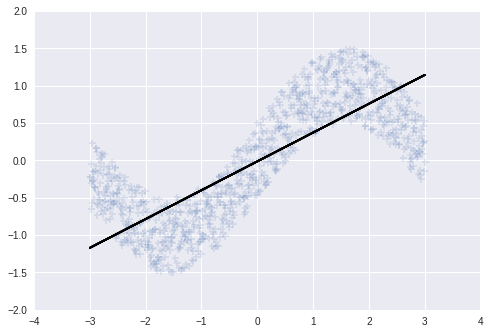

In [43]:
batch_size = 1000

# Plotting
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
ax.set_xlim([-4, 4])
ax.set_ylim([-2, 2])


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    prev_training_cost = 0.0

    for it_i in range(n_iterations):
    
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        if it_i % 10 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            print(training_cost)
fig.show()
plt.draw()

In [0]:
# Training function to train the neural network
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.018):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    with tf.Session() as sess:
        # Here we tell tensorflow that we want to initialize all
        # the variables in the graph so we can use them
        # This will set W and b to their initial random normal value.
        sess.run(tf.global_variables_initializer())

        # We now run a loop over epochs
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
                print(training_cost)
    fig.show()
    plt.draw()
    

2.6307304
2.8089924
2.1421466
2.215995
2.683789
3.1179082
1.9606167
2.7704957
2.522659
1.9780256


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


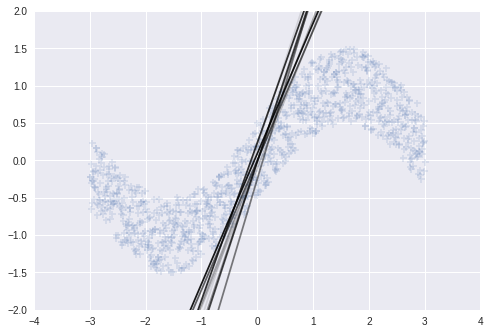

In [51]:
# Creating an inner layer of neurones
n_neurones = 100

W = tf.Variable(tf.random_normal([1, n_neurones], stddev = 0.1))
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurones]))

h = tf.matmul(tf.expand_dims(X, 1), W) + b

Y_pred = tf.reduce_sum(h, 1)
train(X, Y, Y_pred)